In [ ]:
#In this jupyter notebook we try to predict the damage of buildings in case of an earthquake based on features 
# such as Superstructure type, Age, Area etc 

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from xgboost.sklearn import XGBClassifier

plt.style.use('ggplot')

%matplotlib inline

In [115]:
X = pd.read_csv('values.csv')
y = pd.read_csv('labels.csv')

In [116]:
X.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,765,8,501,3237,2,25,33,4,d502,337f,...,0,0,0,0,0,0,0,0,0,0
1,9470,7,288,1819,3,15,28,5,d502,337f,...,0,0,0,0,0,0,0,0,0,0
2,14461,14,36,838,1,20,37,2,d502,337f,...,0,1,0,0,0,0,0,0,0,0
3,9317,8,81,805,2,5,18,3,d502,337f,...,0,0,0,0,0,0,0,0,0,0
4,15941,23,380,4266,3,0,39,6,d502,337f,...,0,0,0,0,0,0,0,0,0,0
5,4767,2,22,5,1,10,24,1,d502,337f,...,0,0,0,0,0,0,0,0,0,0
6,5117,13,531,2699,2,5,24,4,d502,337f,...,0,0,0,0,0,0,0,0,0,0
7,4081,2,50,412,2,5,20,4,808e,6c3e,...,0,0,0,0,0,0,0,0,0,0
8,11259,2,100,640,2,10,29,3,d502,337f,...,0,0,0,0,0,0,0,0,0,0
9,5628,12,27,126,3,40,50,5,d502,337f,...,0,0,0,0,0,0,0,0,0,0


In [117]:
y.head(10)

,building_id,damage_grade
0,765,2
1,9470,3
2,14461,2
3,9317,2
4,15941,3
5,4767,2
6,5117,2
7,4081,3
8,11259,2
9,5628,3


In [118]:
df = X.merge(y, left_on='building_id', right_on='building_id', how='left')

In [119]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,765,8,501,3237,2,25,33,4,d502,337f,...,0,0,0,0,0,0,0,0,0,2
1,9470,7,288,1819,3,15,28,5,d502,337f,...,0,0,0,0,0,0,0,0,0,3
2,14461,14,36,838,1,20,37,2,d502,337f,...,1,0,0,0,0,0,0,0,0,2
3,9317,8,81,805,2,5,18,3,d502,337f,...,0,0,0,0,0,0,0,0,0,2
4,15941,23,380,4266,3,0,39,6,d502,337f,...,0,0,0,0,0,0,0,0,0,3
5,4767,2,22,5,1,10,24,1,d502,337f,...,0,0,0,0,0,0,0,0,0,2
6,5117,13,531,2699,2,5,24,4,d502,337f,...,0,0,0,0,0,0,0,0,0,2
7,4081,2,50,412,2,5,20,4,808e,6c3e,...,0,0,0,0,0,0,0,0,0,3
8,11259,2,100,640,2,10,29,3,d502,337f,...,0,0,0,0,0,0,0,0,0,2
9,5628,12,27,126,3,40,50,5,d502,337f,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
#Plotting correlation between age and damage

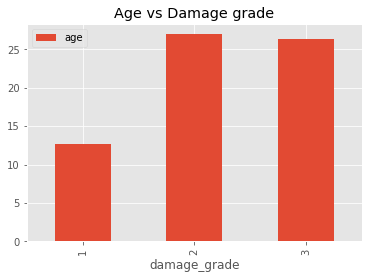

In [120]:
df[['age', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Age vs Damage grade')

In [121]:
df[['age', 'damage_grade']].groupby(['damage_grade']).mean()

,age
damage_grade,
1,12.633262
2,26.965046
3,26.301810


In [ ]:
# Plotting correlation between floors and damage grade

Text(0,0.5,'Average Count of Floors')

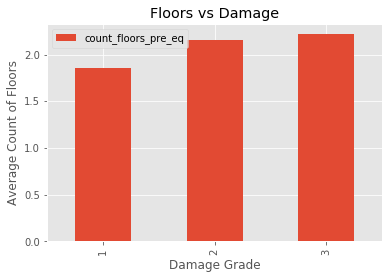

In [122]:
df[['count_floors_pre_eq', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Floors vs Damage')
plt.xlabel('Damage Grade')
plt.ylabel('Average Count of Floors')

In [123]:
df[['count_floors_pre_eq', 'damage_grade']].groupby(['damage_grade']).mean()

,count_floors_pre_eq
damage_grade,
1,1.860341
2,2.152236
3,2.215995


In [124]:
df['count_floors_pre_eq'].describe()

count    10000.000000
mean         2.146700
std          0.736365
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: count_floors_pre_eq, dtype: float64

In [ ]:
# Plotting correlation between height and damage grade

Text(0,0.5,'Average Height')

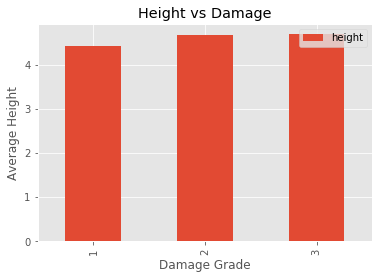

In [125]:
df[['height', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Height vs Damage')
plt.xlabel('Damage Grade')
plt.ylabel('Average Height')

In [126]:
df['height'].describe()

count    10000.000000
mean         4.653100
std          1.792842
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         30.000000
Name: height, dtype: float64

Text(0,0.5,'Average area')

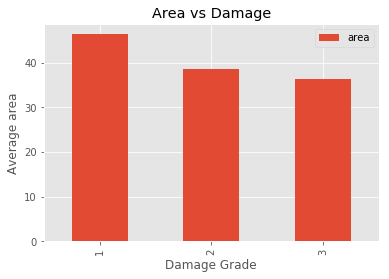

In [127]:
df[['area', 'damage_grade']].groupby(['damage_grade']).mean().plot(kind='bar', title='Area vs Damage')
plt.xlabel('Damage Grade')
plt.ylabel('Average area')

In [128]:
df['area'].describe()

count    10000.000000
mean        38.438100
std         21.265883
min          6.000000
25%         26.000000
50%         34.000000
75%         44.000000
max        425.000000
Name: area, dtype: float64

In [ ]:
df.columns

In [ ]:
#EXPLORATORY DATA ANALYSIS
#Here we are trying to find which features are important to help us predict which buildings are unsafe in an earthquake 

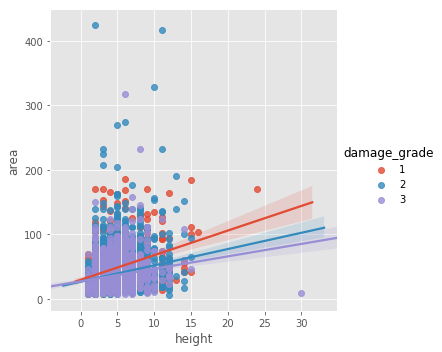

In [130]:
sns.lmplot(x="height", y="area", hue="damage_grade", data=df)

In [131]:
df['superstructure'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone']].idxmax(axis=1)
df['superstructure_type'] = df[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']].idxmax(axis=1)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


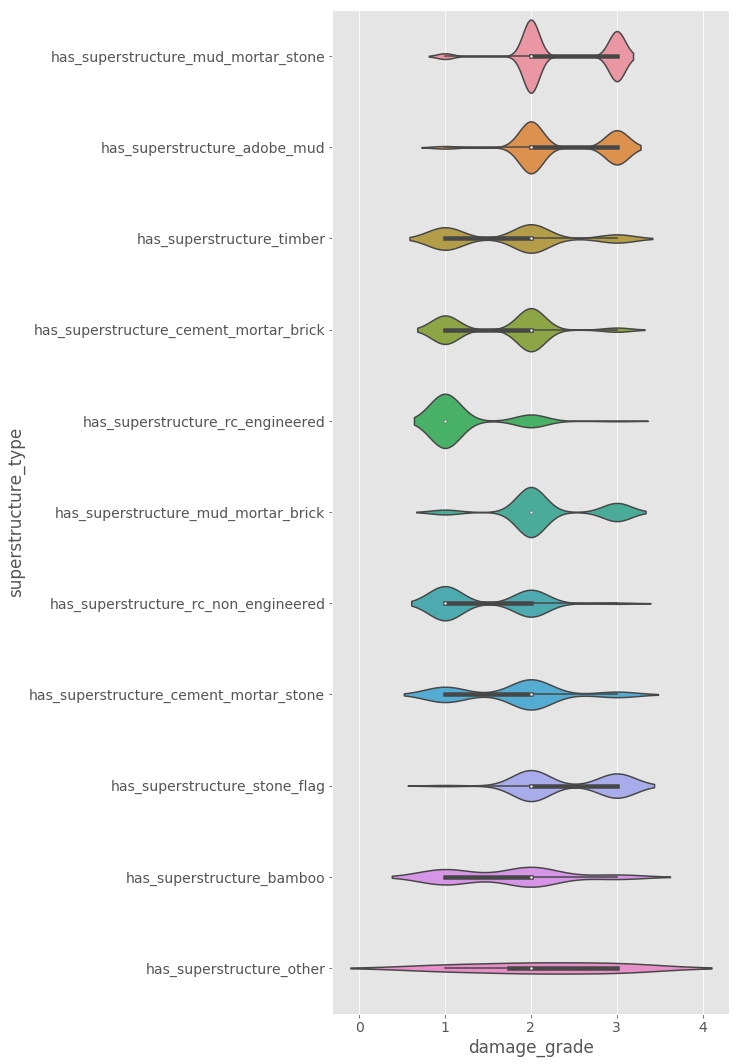

In [132]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="superstructure_type", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


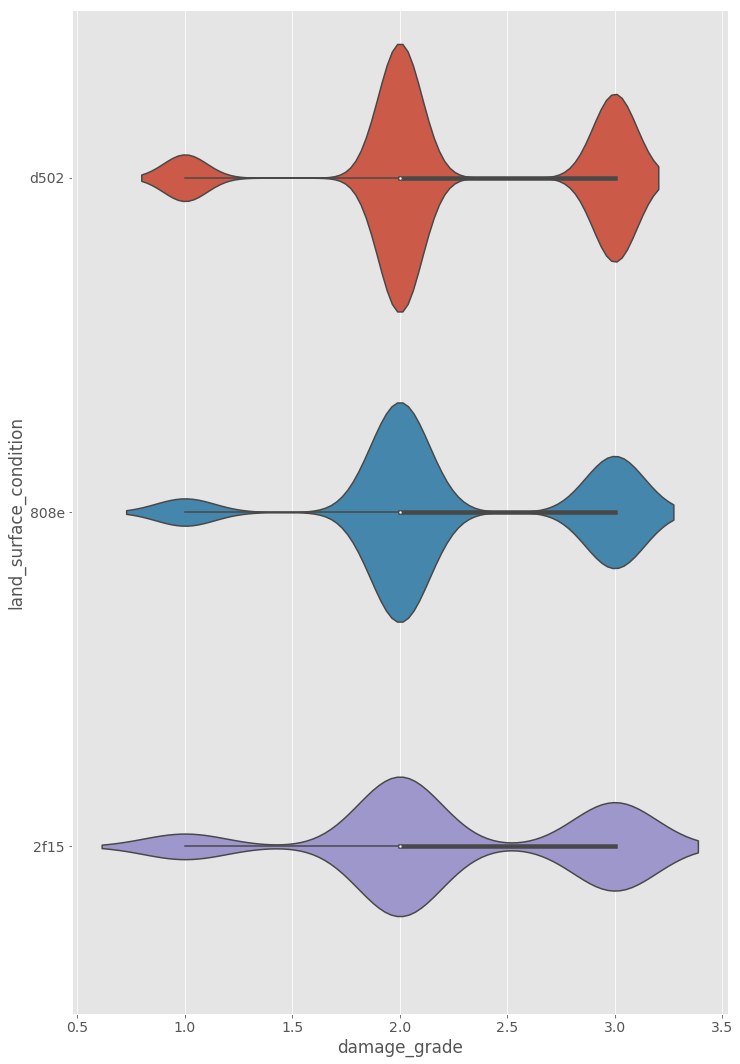

In [133]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="land_surface_condition", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


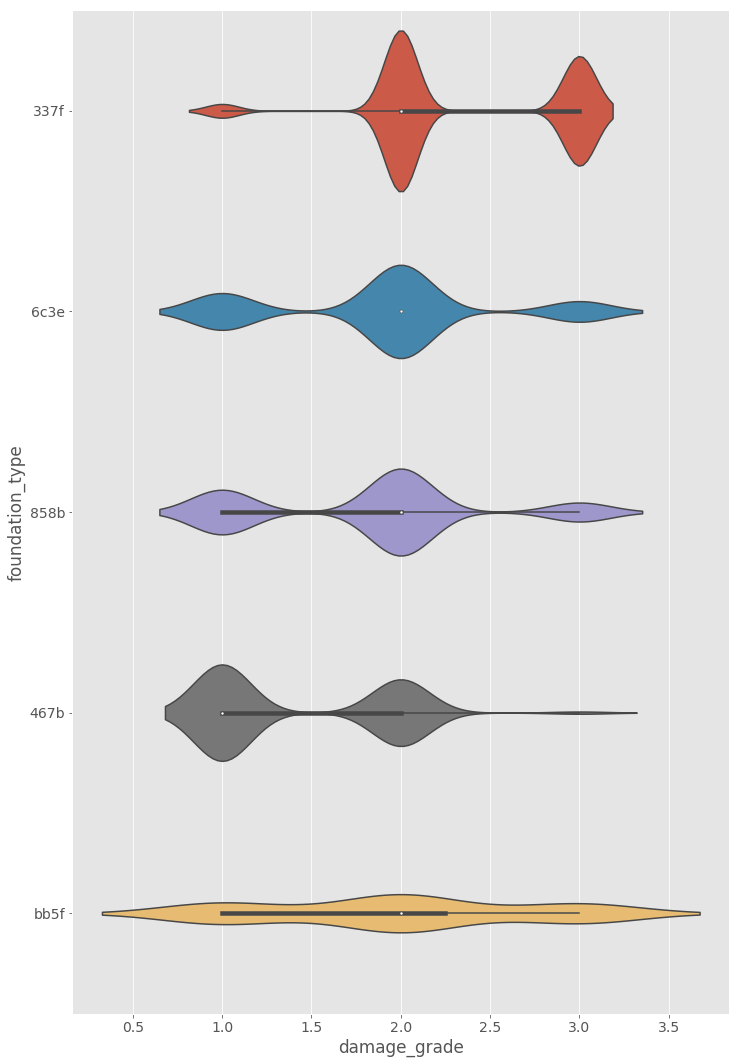

In [134]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="foundation_type", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


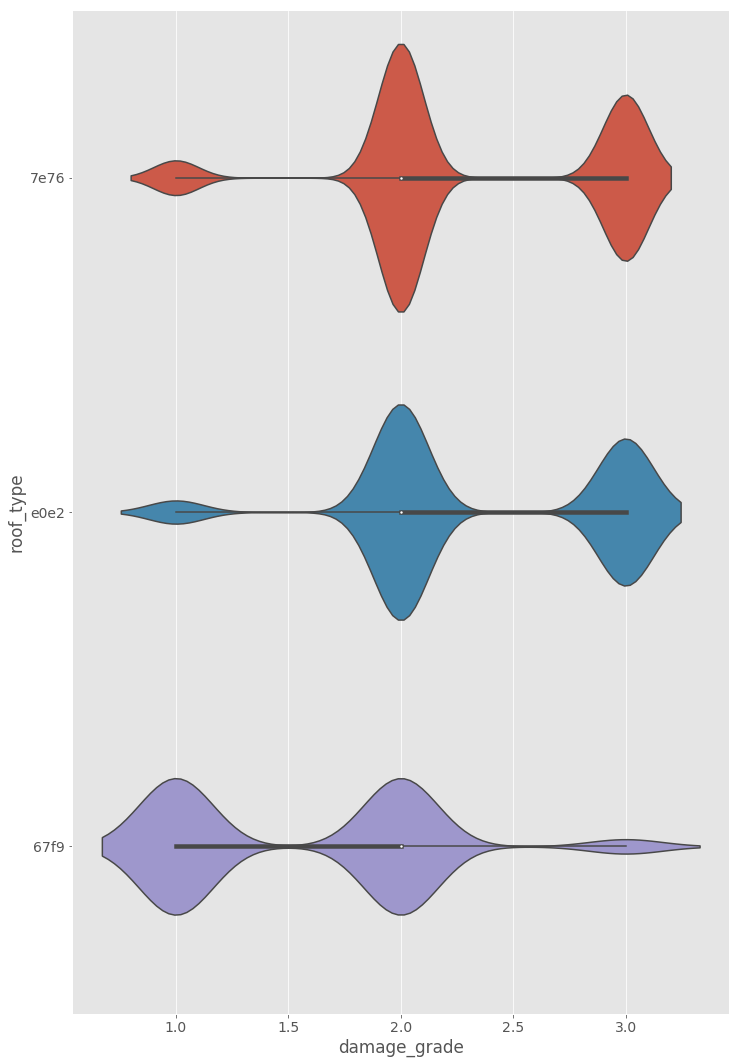

In [135]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="roof_type", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


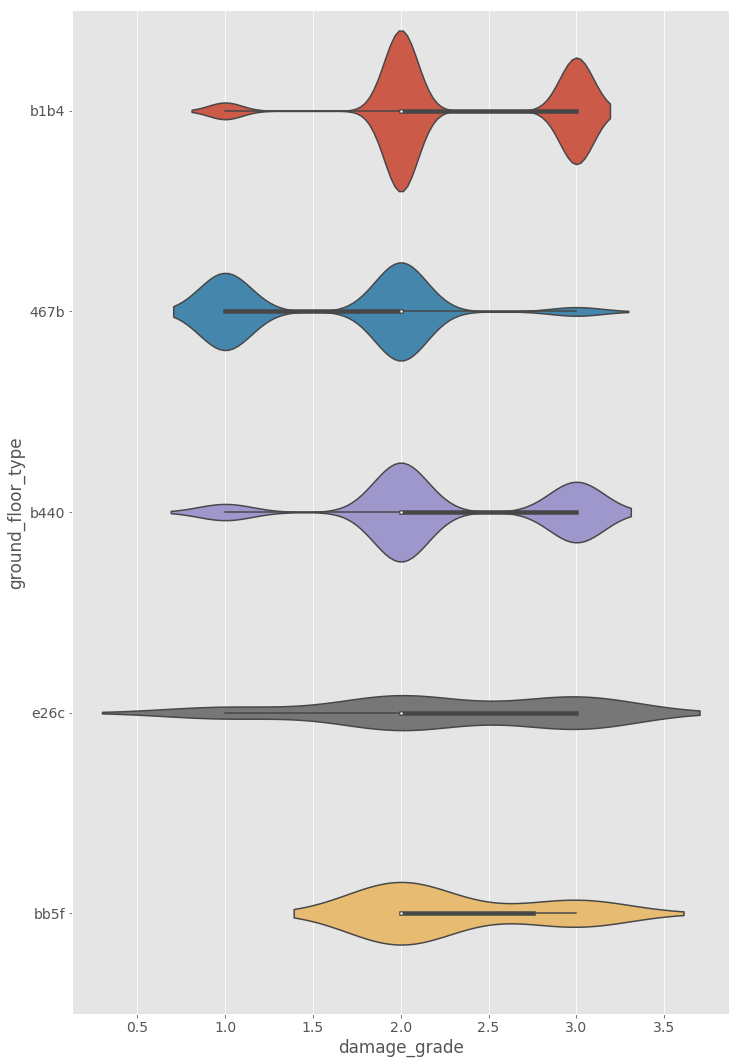

In [136]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="ground_floor_type", data=df, kind="violin", size=15, aspect=.7);

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


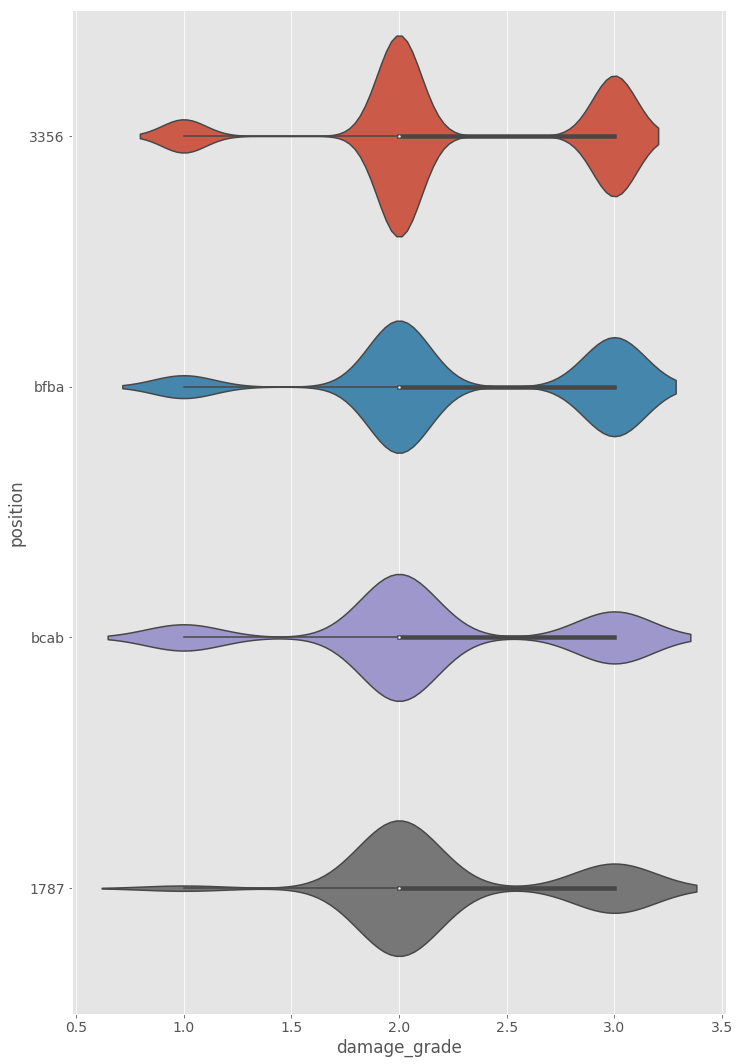

In [137]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="position", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


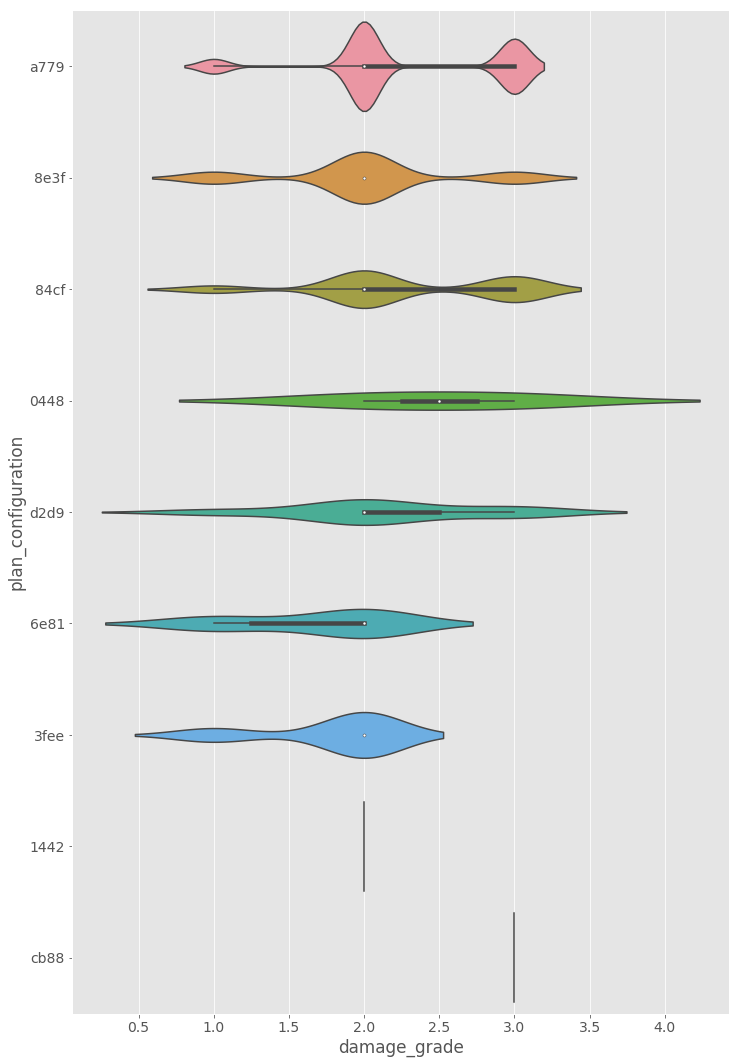

In [138]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="plan_configuration", data=df, kind="violin", size=15, aspect=.7)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


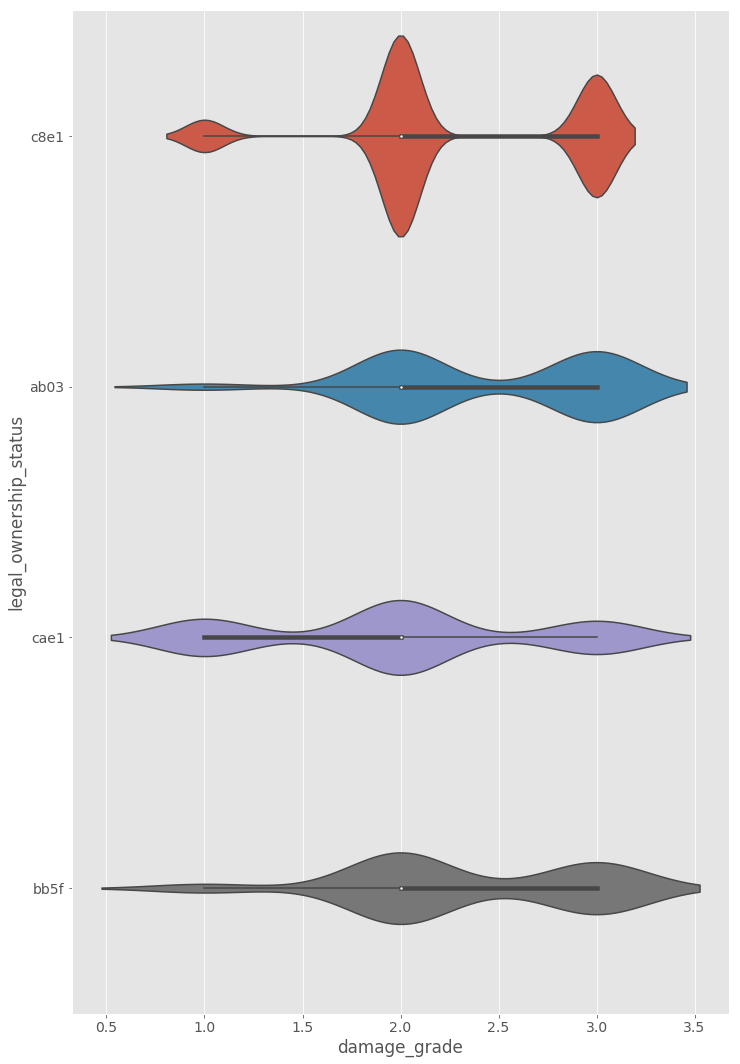

In [139]:
plt.rcParams.update({'font.size': 14})
sns.factorplot(x="damage_grade", y="legal_ownership_status", data=df, kind="violin", size=15, aspect=.7);

df.columns

In [ ]:
#Dropping collumns that have low importance

In [143]:
df = df.drop([
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'superstructure',
 'has_superstructure_adobe_mud',
'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick',
'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
'has_superstructure_rc_engineered', 'has_superstructure_other'], axis = 1)

In [144]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area', 'height',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status', 'damage_grade',
       'superstructure_type'],
      dtype='object')

In [ ]:
#Encoding the data

In [145]:
df = pd.get_dummies(df)

In [146]:
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area,height,damage_grade,land_surface_condition_2f15,...,superstructure_type_has_superstructure_bamboo,superstructure_type_has_superstructure_cement_mortar_brick,superstructure_type_has_superstructure_cement_mortar_stone,superstructure_type_has_superstructure_mud_mortar_brick,superstructure_type_has_superstructure_mud_mortar_stone,superstructure_type_has_superstructure_other,superstructure_type_has_superstructure_rc_engineered,superstructure_type_has_superstructure_rc_non_engineered,superstructure_type_has_superstructure_stone_flag,superstructure_type_has_superstructure_timber
0,765,8,501,3237,2,25,33,4,2,0,...,0,0,0,0,1,0,0,0,0,0
1,9470,7,288,1819,3,15,28,5,3,0,...,0,0,0,0,1,0,0,0,0,0
2,14461,14,36,838,1,20,37,2,2,0,...,0,0,0,0,1,0,0,0,0,0
3,9317,8,81,805,2,5,18,3,2,0,...,0,0,0,0,1,0,0,0,0,0
4,15941,23,380,4266,3,0,39,6,3,0,...,0,0,0,0,1,0,0,0,0,0
5,4767,2,22,5,1,10,24,1,2,0,...,0,0,0,0,1,0,0,0,0,0
6,5117,13,531,2699,2,5,24,4,2,0,...,0,0,0,0,1,0,0,0,0,0
7,4081,2,50,412,2,5,20,4,3,0,...,0,0,0,0,1,0,0,0,0,0
8,11259,2,100,640,2,10,29,3,2,0,...,0,0,0,0,1,0,0,0,0,0
9,5628,12,27,126,3,40,50,5,3,0,...,0,0,0,0,1,0,0,0,0,0


In [147]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area', 'height', 'damage_grade',
       'land_surface_condition_2f15', 'land_surface_condition_808e',
       'land_surface_condition_d502', 'foundation_type_337f',
       'foundation_type_467b', 'foundation_type_6c3e', 'foundation_type_858b',
       'foundation_type_bb5f', 'roof_type_67f9', 'roof_type_7e76',
       'roof_type_e0e2', 'ground_floor_type_467b', 'ground_floor_type_b1b4',
       'ground_floor_type_b440', 'ground_floor_type_bb5f',
       'ground_floor_type_e26c', 'other_floor_type_441a',
       'other_floor_type_67f9', 'other_floor_type_9eb0',
       'other_floor_type_f962', 'position_1787', 'position_3356',
       'position_bcab', 'position_bfba', 'plan_configuration_0448',
       'plan_configuration_1442', 'plan_configuration_3fee',
       'plan_configuration_6e81', 'plan_configuration_84cf',
       'plan_configuration_8e3f', 'plan_configuration_a779',
       '

In [148]:
df = df.drop([
    'superstructure_type_has_superstructure_other',
    'foundation_type_bb5f',
    'plan_configuration_0448'
], axis = 1)

In [ ]:
#Creating X and Y value to give the Grdient boosting classifier(ML Model) where X is the input and Y is the output label(The output which is pedicted like the building damage)

In [150]:
y = df['damage_grade']
X = df.drop(['building_id', 'damage_grade'], axis=1)

In [154]:
y1 = y
X1 = X

In [ ]:
# Split the x and Y values for train data and test data

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2, random_state=54321)

In [ ]:
# Create a gradient boosting model to predict building damages

In [272]:
xboost = XGBClassifier(n_estimators=2500,min_child_weight=4,colsample_bylevel=.7,colsample_bytree=.7,gamma=2, random_state=54321, n_jobs=20)

In [273]:
xboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=2500,
       n_jobs=20, nthread=None, objective='multi:softprob',
       random_state=54321, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [274]:
xboost_pred = xboost.predict(X_test)

/home/bahushruth/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [275]:
xgboost_score = f1_score(y_test, xboost_pred, average='micro')
xgboost_score

0.6925

In [276]:
confusion_xboost = confusion_matrix(y_test, xboost_pred)
confusion_xboost

array([[ 62, 121,   2],
       [ 39, 942, 152],
       [  5, 296, 381]])

In [ ]:
#As you can see the classifiers accuracy is lower than hoped for but this is due to very few values for damage grade 1.
# Hence the classifier has a few problem
# The classifier however classified dangerous buildings as safe only twice
# This can be seen in the confusion matrix above where the x axis is actual class (1,2,3) and Y axis is predicted class(1,2,3)